<a href="https://colab.research.google.com/github/xymmetry/machinelearning/blob/main/Apple_5_year_Stock_Analysis_Marc_David.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Apple Stock - 5 Year Historical Data Analysis & Forecasting**

Marc David

In [196]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import sqrt
import yfinance as yf
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.statespace.sarimax import SARIMAX
%matplotlib inline
from sklearn import decomposition
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Source of Data:

Yahoo Finance. (n.d.). Apple Inc. (AAPL) - Yahoo Finance. https://finance.yahoo.com/quote/AAPL/history?p=AAPL

In [79]:
symbol = "AAPL"
start_date = "2018-01-01"
end_date = "2023-01-01"
df = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [80]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1.259000e+03
mean,98.028503,99.217804,96.881497,98.092897,96.404321,1.168806e+08
std,46.302471,46.894754,45.688159,46.309891,46.477310,5.504461e+07
min,35.994999,36.430000,35.500000,35.547501,34.163826,3.519590e+07
25%,50.956249,51.448750,50.573750,51.022501,49.297941,8.014245e+07
50%,91.279999,92.970001,90.910004,91.632500,89.843636,1.023002e+08
75%,142.760002,144.474998,141.004997,142.864998,141.563110,1.372052e+08
max,182.630005,182.940002,179.119995,182.009995,180.190979,4.265100e+08


Data Preprocessing

In [81]:
df['Daily Return'] = df['Adj Close'].pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.776524,102223600,NaN
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769428,118071600,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958794,89738400,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425137,94640000,0.011386
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271259,82271200,-0.003715
...,...,...,...,...,...,...,...
2022-12-23,130.919998,132.419998,129.639999,131.860001,131.299820,63814900,-0.002798
2022-12-27,131.380005,131.410004,128.720001,130.029999,129.477585,69007800,-0.013878
2022-12-28,129.669998,131.029999,125.870003,126.040001,125.504539,85438400,-0.030685


In [82]:
df.isnull().sum()

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Daily Return    1
dtype: int64

In [83]:
df.dropna(inplace=True)

In [85]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Daily Return
Date,,,,,,,
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.769428,118071600,-0.000174
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.958794,89738400,0.004645
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.425137,94640000,0.011386
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.271259,82271200,-0.003715
2018-01-09,43.637501,43.764999,43.352501,43.582500,41.266529,86336000,-0.000115


Data Visualization

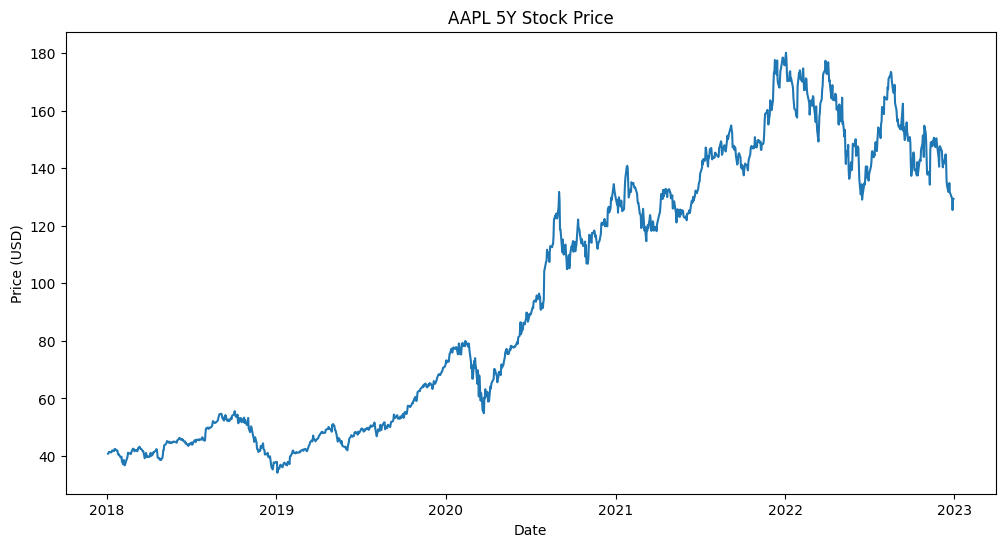

In [86]:
plt.figure(figsize=(12,6))
plt.plot(df['Adj Close'], label='Stock Price')
plt.title('AAPL 5Y Stock Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

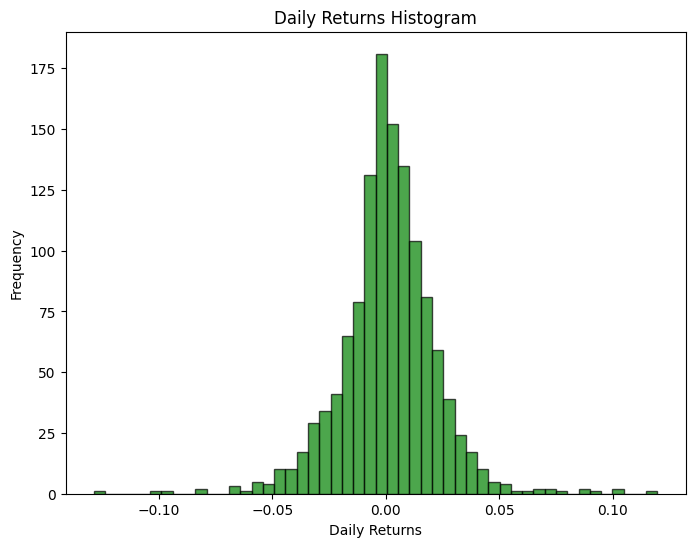

In [87]:
plt.figure(figsize=(8,6))
plt.hist(df['Daily Return'],bins=50, alpha=0.7, color='green',edgecolor='black')
plt.title('Daily Returns Histogram')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.show()

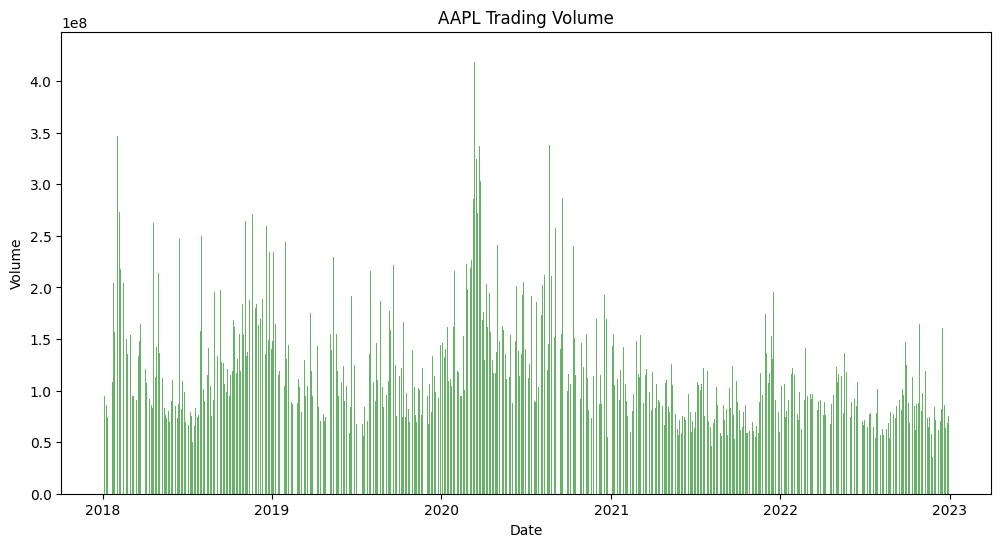

In [88]:
#Stock Volume Visualization

plt.figure(figsize=(12, 6))
plt.bar(df.index, df['Volume'], color='green', alpha=0.6)
plt.title('AAPL Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

Time Series Analysis

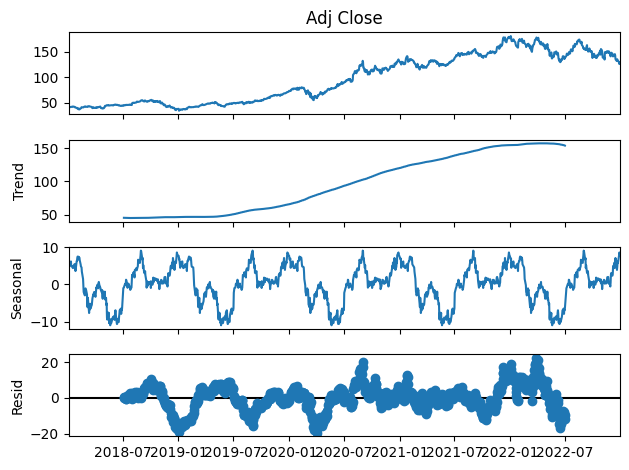

In [96]:
resPrice = seasonal_decompose(df['Adj Close'], model='additive', period=252)
#The value of period is 252 because of 252 trading days in a year
#Stock Price Analysis
resP = resPrice.plot()
resP.show() #to fix a bug of seasonal decompose showing duplicate graphs

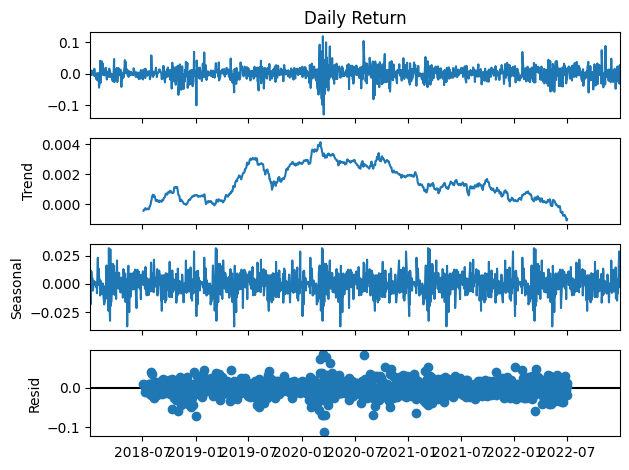

In [97]:
resReturn = seasonal_decompose(df['Daily Return'], model='additive', period=252)
resR = resReturn.plot()
resR.show() #to fix a bug of seasonal decompose showing duplicate graphs

Predictive Modeling

In [133]:
#splitting data into training and testing
trainsize = int(len(df) * 0.8)
traindata, testdata = df['Adj Close'][:trainsize], df['Adj Close'][trainsize:]


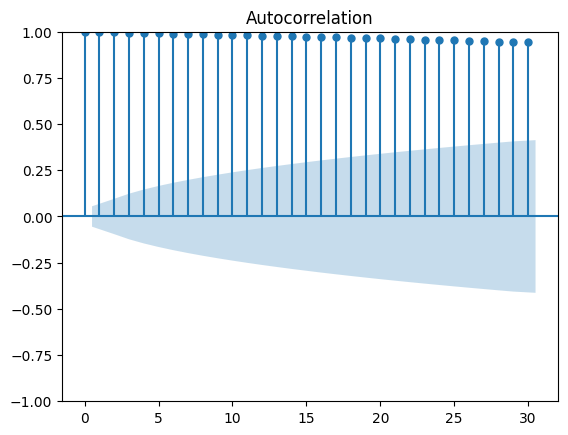

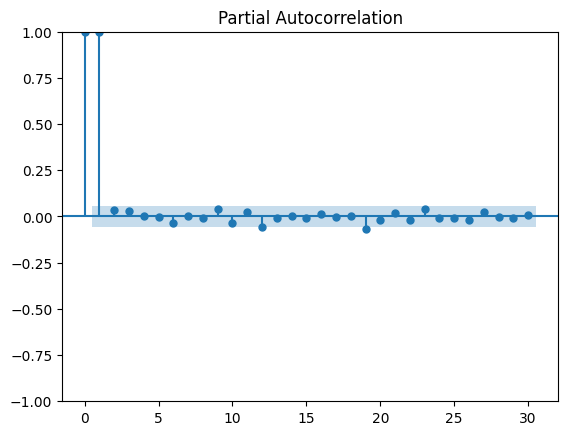

In [144]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Adj Close'], lags=30)
plot_pacf(df['Adj Close'], lags=30)
plt.show()

In [197]:
#Used 30 for seasonality due to using daily data
model = SARIMAX(df['Adj Close'], order=(2, 1, 1), seasonal_order=(2, 1, 1, 30))
modelfit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [160]:
forecast = modelfit.get_forecast(steps=30)
forecastmean = forecast.predicted_mean
forecastConf_int = forecast.conf_int()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [167]:
forecaststeps = 30
actualprices = df['Adj Close'].tail(forecaststeps)
RMSE = np.sqrt(mean_squared_error(actualprices, forecastmean))
print(f'Root Mean Squared Error (RMSE):', {RMSE})

Root Mean Squared Error (RMSE): {12.886564360456795}


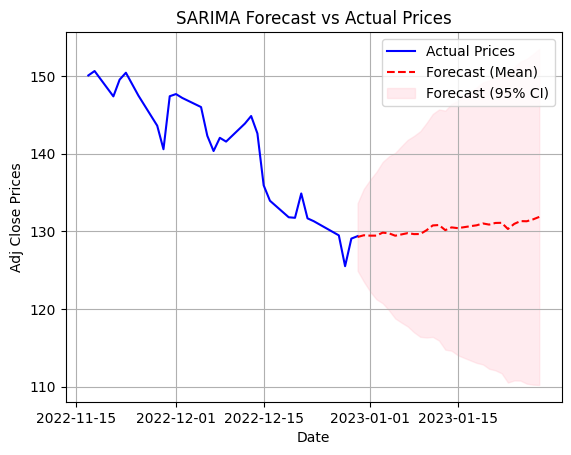

In [168]:
# Plot actual prices
plt.plot(df.index[-forecaststeps:], actualprices, label='Actual Prices', color='blue')

# Plot forecasted mean
forecast_index = pd.date_range(start=df.index[-1], periods=forecaststeps, freq='D')  # Create an index for the forecasted values
plt.plot(forecast_index, forecastmean, label='Forecast (Mean)', color='red', linestyle='--')

# Plot forecasted confidence interval
plt.fill_between(forecast_index, forecastConf_int.iloc[:, 0], forecastConf_int.iloc[:, 1], color='pink', alpha=0.3, label='Forecast (95% CI)')

plt.title('SARIMA Forecast vs Actual Prices')
plt.xlabel('Date')
plt.ylabel('Adj Close Prices')
plt.legend()
plt.grid(True)
plt.show()

In [171]:
#SARIMA EVALUATION
actual_prices = df['Adj Close'].tail(forecaststeps)
rmseSAR = np.sqrt(mean_squared_error(actualprices, forecastmean))
maeSAR = mean_absolute_error(actualprices, forecastmean)
print("SARIMA Evaluation:")
print(f"Root Mean Squared Error (RMSE):", {rmseSAR})
print(f"Mean Absolute Error (MAE):", {maeSAR})

SARIMA Evaluation:
Root Mean Squared Error (RMSE): {12.886564360456795}
Mean Absolute Error (MAE): {10.803370698616009}


Forecasting using Random Forest Regressor

In [172]:
X = df.drop(columns=['Adj Close'])
y = df['Adj Close']

In [173]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)


In [174]:
rfmodel = RandomForestRegressor(n_estimators=100, random_state=42)
rfmodel.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [178]:
forecastRF = rfmodel.predict(Xtest)
rmseRF = np.sqrt(mean_squared_error(ytest, forecastRF))
maeRF = mean_absolute_error(ytest, forecastRF)
print("Random Forest Evaluation:")
print(f"Root Mean Squared Error (RMSE):", {rmseRF})
print(f"Mean Absolute Error (MAE):", {maeRF})

Random Forest Evaluation:
Root Mean Squared Error (RMSE): {0.4178680818249883}
Mean Absolute Error (MAE): {0.313732531865438}


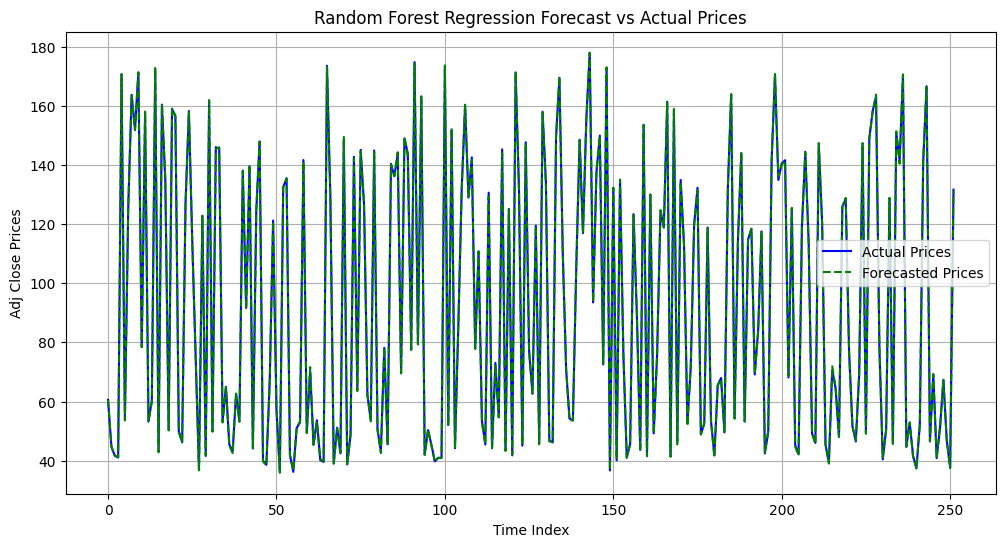

In [195]:
time_index = range(len(ytest)) #time index

plt.figure(figsize=(12, 6))
plt.plot(time_index, ytest, label='Actual Prices', color='blue')
plt.plot(time_index, forecastRF, label='Forecasted Prices', color='green', linestyle='--')

plt.title('Random Forest Regression Forecast vs Actual Prices')
plt.xlabel('Time Index')
plt.ylabel('Adj Close Prices')
plt.legend()
plt.grid(True)
plt.show()